In [2]:
using PyPlot

In [1]:
a = 2.834588983
b = 0.944862994
v2 = 4.593666
m = 1
hbar = 1 
K(E) = sqrt(2E)
Q(E) = sqrt(2*(v2 - E))
P(E) = Q(E)^2*a*b/2

P (generic function with 1 method)

In [32]:
f(k) = cos(k*(b+a))

f (generic function with 1 method)

In [3]:
F(K,Q) = (Q^2 - K^2)/(2*Q*K)*sinh(Q*b)*sin(K*a) + cosh(Q*b)cos(K*a)

F (generic function with 1 method)

In [41]:
F(E) = (Q(E)^2 - K(E)^2)/(2*Q(E)*K(E))*sinh(Q(E)*b)*sin(K(E)*a) + cosh(Q(E)*b)cos(K(E)*a)

F (generic function with 2 methods)

In [22]:
domain = linspace(0.1,4.58,1000)
codomain = [F(K(E),Q(E)) for E in domain];

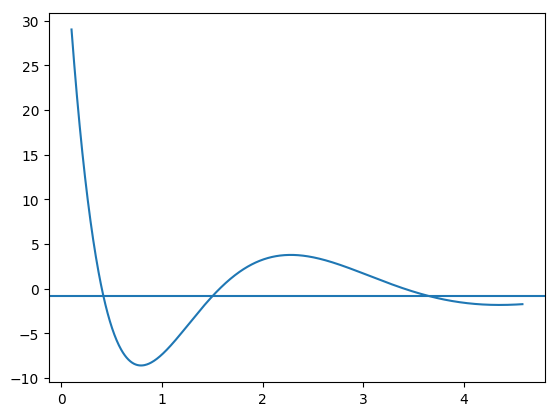

In [35]:
plot(domain,codomain)
#axhline(1)
axhline(f(1))
#axhline(-1)
show()

In [27]:
energies = []
index = []

for i in 1:length(codomain)-1
    if codomain[i] > 1 && codomain[i+1] <1
        push!(energies,domain[i+1])
        push!(index,i+1)
    elseif codomain[i] < 1 && codomain[i+1] > 1
        push!(energies,domain[i])
        push!(index,i)
    elseif codomain[i] > -1 && codomain[i+1] < -1
        push!(energies,domain[i])
        push!(index,i)
    elseif codomain[i] < -1 && codomain[i+1] > -1
        push!(energies,domain[i+1])
        push!(index,i+1)
    end
end
energies

6-element Array{Any,1}:
 0.387007
 0.418398
 1.49019 
 1.66509 
 3.1629  
 3.71001 

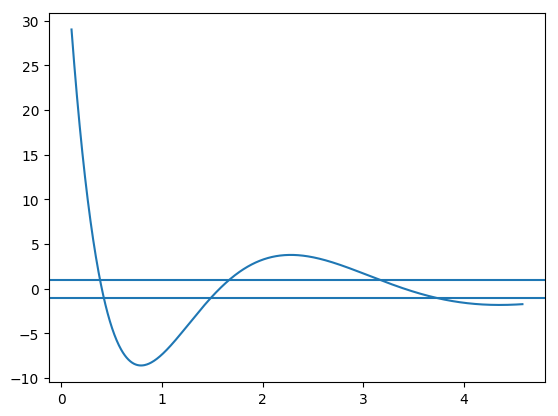

In [31]:
plot(domain,codomain)
axhline(f())
axhline(-1)
show()

In [65]:
function find_r(val, f, a, b, eps = 1e-4)
    
    g(x) = f(x) - val
    
    i = 0
    while i < 100
        x = (a+b)/2
        if g(x) == 0 || (b-a)/2 < eps
            return x
            break
        end
        i += 1
        if sign(g(x)) == sign(g(a))
            a = x
        else
            b = x
        end
    end
    
    return x
    
end

find_r (generic function with 2 methods)

In [68]:
find_r(f(0.),x->F(x),1e-10,1,1e-6)

0.38290500647040093

In [69]:
F(0.38290500647040093)

1.0000479934857154

In [70]:
fact = a/π

0.9022776965565571

In [99]:
E_ar = []

points = 400

k = linspace(1e-9,fact,points)

for i in 1:length(k)
    En = find_r(f(k[i]),x->F(x),1e-10,1,1e-6)
    push!(E_ar,En)
end

k2 = linspace(fact*1,fact*2,points)

for i in 1:length(k)
    En = find_r(f(k2[i]),x->F(x),1,2,1e-6)
    push!(E_ar,En)
end

k3 = linspace(fact*2,fact*3,points)

for i in 1:length(k)
    En = find_r(f(k3[i]),x->F(x),3,4,1e-6)
    push!(E_ar,En)
end

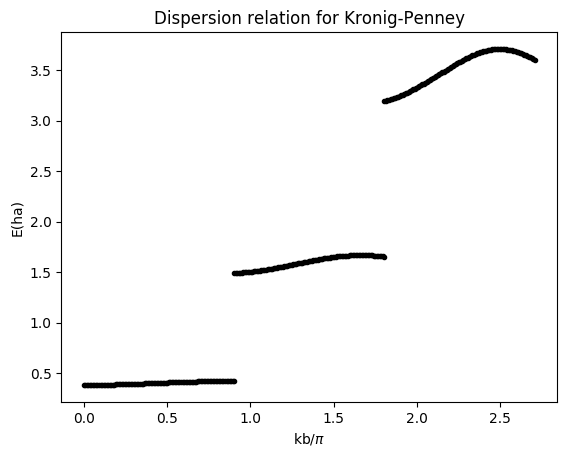

In [88]:
plot(vcat(k,k2,k3),E_ar,"k.")
ylabel("E(ha)")
xlabel(L"kb/$\pi$")
title("Dispersion relation for Kronig-Penney")
savefig("numsol.png")
show()

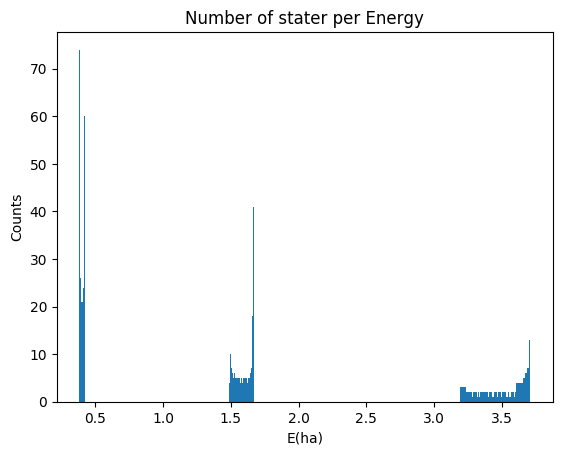

In [101]:
nbins = 1000


ax = axes() # Not strictly required
h = plt[:hist](E_ar,nbins) # Histogram

grid("on")
xlabel("E(ha)")
ylabel("Counts")
grid("off")
title("Number of stater per Energy")
savefig("hist.png")